# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
import requests
import time



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [3]:
# cities=cities[:5]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas


Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | newman
Processing Record 4 of Set 1 | pontes e lacerda
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | maitum
Processing Record 10 of Set 1 | itoman
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | wynyard
Processing Record 15 of Set 1 | dryden
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | argo
Processing Record 21 of Set 1 | bandarbeyla
Processing Record 22 of Set 1 | tamiahua
Processing Record 23 of Set 1 | mar del plata
Processing Record 24 of Set 1 | guerrero negro
Processing Record 25 of Set 1 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,54.77,69,88,11.23,SH,1699561666
1,papatowai,-46.5619,169.4708,47.82,56,86,0.76,NZ,1699561438
2,newman,37.3138,-121.0208,67.05,36,100,3.00,US,1699561069
3,pontes e lacerda,-15.2261,-59.3353,83.55,63,100,2.89,BR,1699561671
4,bredasdorp,-34.5322,20.0403,59.05,79,0,5.61,ZA,1699561446


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,54.77,69,88,11.23,SH,1699561666
1,papatowai,-46.5619,169.4708,47.82,56,86,0.76,NZ,1699561438
2,newman,37.3138,-121.0208,67.05,36,100,3.00,US,1699561069
3,pontes e lacerda,-15.2261,-59.3353,83.55,63,100,2.89,BR,1699561671
4,bredasdorp,-34.5322,20.0403,59.05,79,0,5.61,ZA,1699561446


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

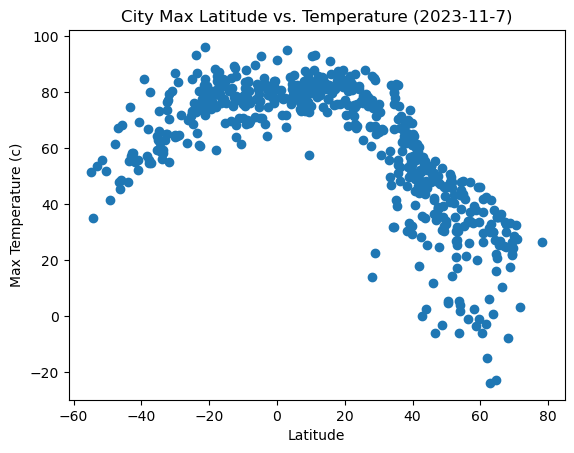

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.title('City Max Latitude vs. Temperature (2023-11-7)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

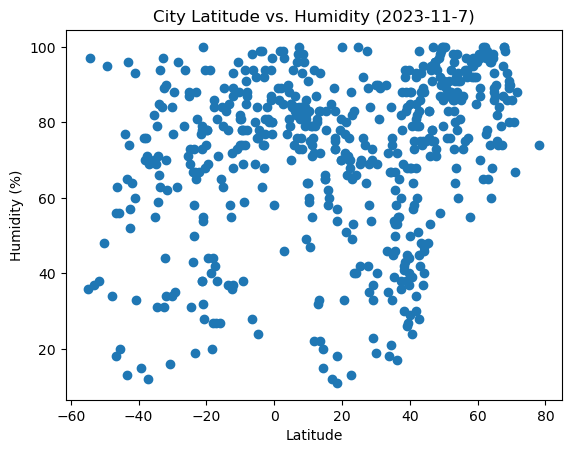

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-11-7)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

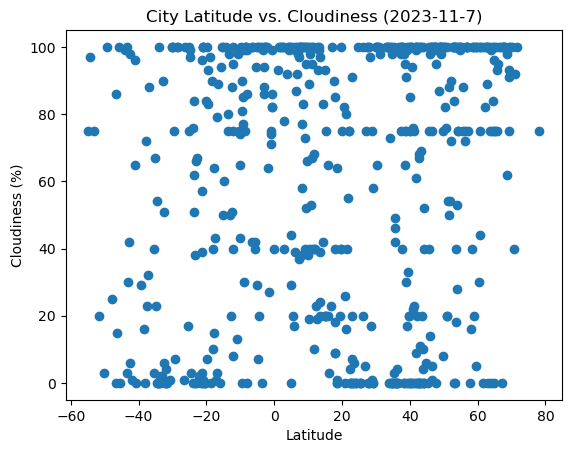

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-11-7)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

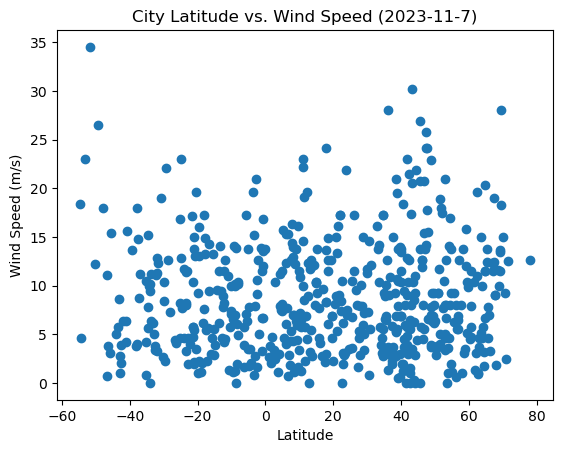

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-11-7)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def linear_function(x_values, y_values, titles, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
            
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    print(f"The r-squared is: {rvalue**2}")

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,newman,37.3138,-121.0208,67.05,36,100,3.00,US,1699561069
6,bilibino,68.0546,166.4372,-7.65,99,100,1.86,RU,1699561565
8,maitum,6.0392,124.4986,77.97,83,39,4.00,PH,1699561679
9,itoman,26.1247,127.6694,79.57,92,20,11.50,JP,1699561680
10,longyearbyen,78.2186,15.6401,26.44,74,75,12.66,SJ,1699561683


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,54.77,69,88,11.23,SH,1699561666
1,papatowai,-46.5619,169.4708,47.82,56,86,0.76,NZ,1699561438
3,pontes e lacerda,-15.2261,-59.3353,83.55,63,100,2.89,BR,1699561671
4,bredasdorp,-34.5322,20.0403,59.05,79,0,5.61,ZA,1699561446
5,waitangi,-43.9535,-176.5597,47.82,77,99,5.01,NZ,1699561466


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6947419897814225


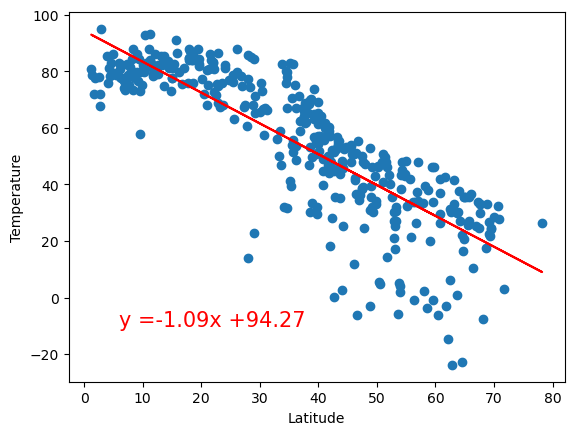

In [70]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

linear_function(x_values, y_values,'Max Temp',(6,-10))

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

The r-squared is: 0.47276850661824515


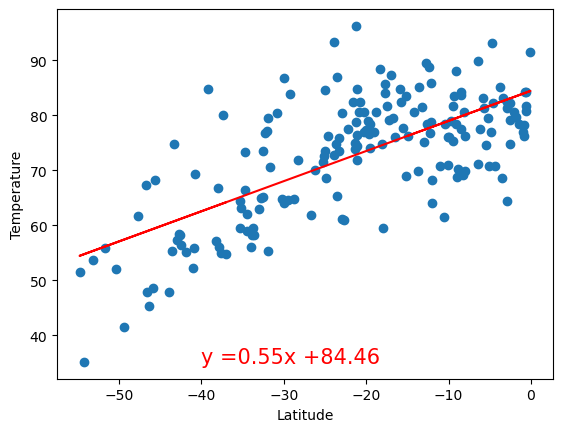

In [71]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']

linear_function(x_values, y_values,'Max Temp',(-40,35))

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04677851066178916


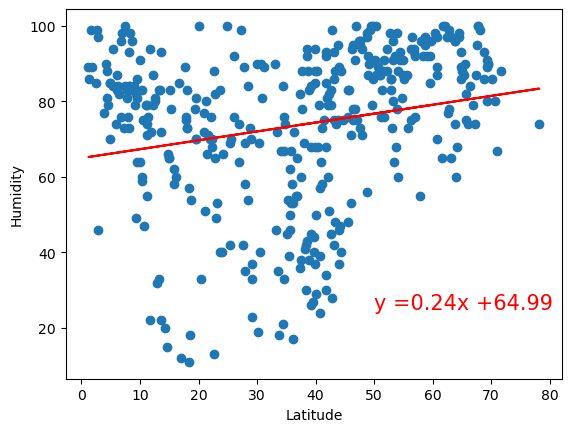

In [72]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']

linear_function(x_values, y_values,'Humidity',(50,25))

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.09901550127856742


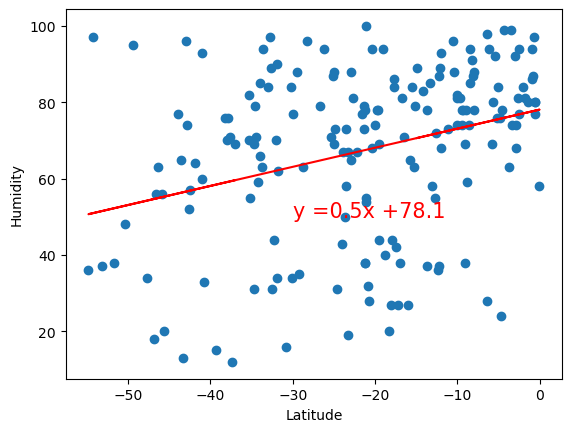

In [74]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

linear_function(x_values, y_values,'Humidity',(-30,50))

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.013896210041611437


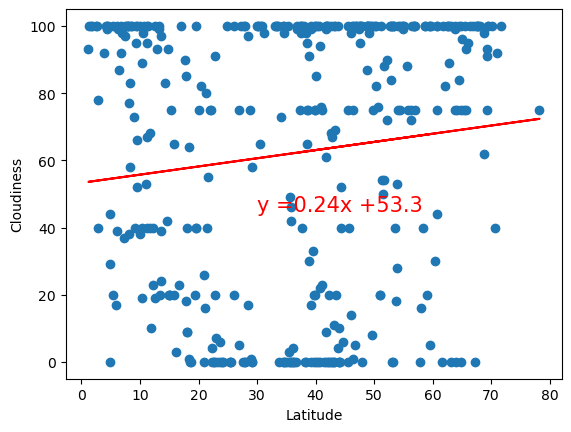

In [76]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

linear_function(x_values, y_values,'Cloudiness',(30,45))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.08106495986423821


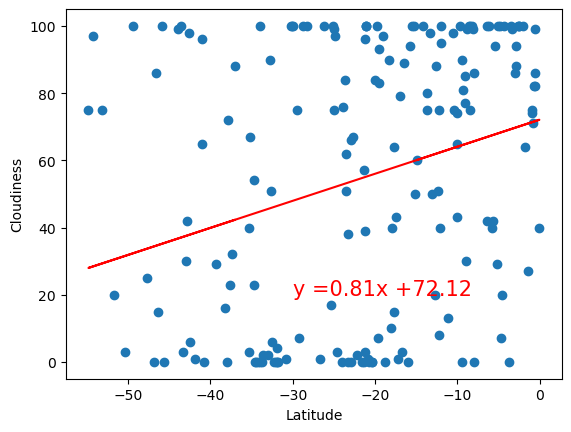

In [77]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']

linear_function(x_values, y_values,'Cloudiness',(-30,20))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005357719222083181


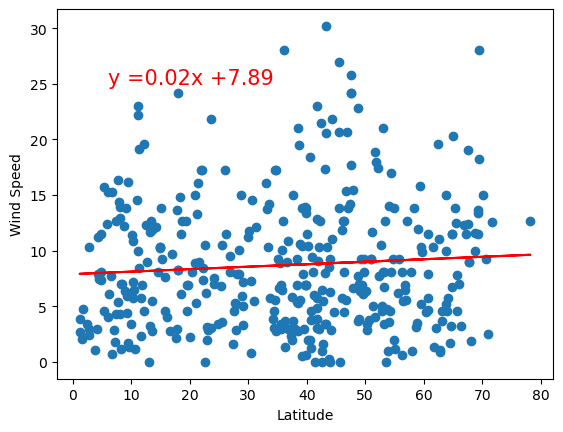

In [79]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

linear_function(x_values, y_values,'Wind Speed',(6,25))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.015650149299720754


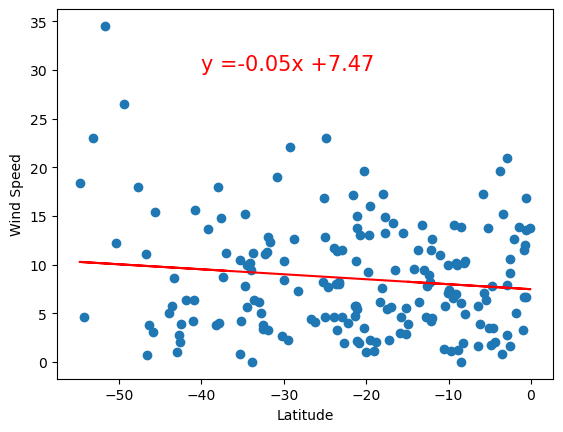

In [80]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

linear_function(x_values, y_values,'Wind Speed',(-40,30))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE